In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
import pandas as pd
import networkx as nx
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

Code for Figure visualisation for the study:

### Individual energy dynamics mediate mammal community response to combined habitat fragmentation and drought stress

Leonna Szangolies, Cara A. Gallagher, Florian Jeltsch

Define colours:

In [6]:
colors_behaviour=sns.color_palette("mako", 4)

In [7]:
colors_species=sns.color_palette("cubehelix", 10)

In [8]:
colors_drought=sns.color_palette("cubehelix", 10)

In [9]:
colors_frag=sns.color_palette("mako", 4)

Read in data:

In [7]:
controlled = pd.read_csv("mibcom_controlled_singlespecies.csv")


In [8]:
indivs_single2=np.zeros((3,7,10,20,1095))
fmrs2=np.zeros((3,7,10,20,1095))
ins2=np.zeros((3,7,10,20,1095))
balances2=np.zeros((3,7,10,20,1095))
repros2=np.zeros((3,7,10,20,1095))
drought_hr2=np.zeros((3,7,10,20,1095))
drought_stor2=np.zeros((3,7,10,20,1095))
drought_locos2=np.zeros((3,7,10,20,1095))
drought_compet2=np.zeros((3,7,10,20,1095))

repsuc_2=np.zeros((3,7,10,20))
repsuchr_2=np.zeros((3,7,10,20))

f=controlled
ix=0
for i in [0.9999,0.999,0.99]:
    fi=f[f["clump"]==i]
    lx=0
    for l in [1,2,3,4,5,6,7]:
                fl=fi[fi["drought_scenario_combi"]==l]
                for j in range(10):
                    f11=fl[fl["specs-included"]==j]
                    rx=0
                    for r in np.unique(f11["[run number]"]):
                            f1=f11[f11["[run number]"]==r]
                            current_array=str.split(list(f1["number"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            indivs_single2[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["fmr"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            fmrs2[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["in"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            ins2[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["balance"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            balances2[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["repro"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            repros2[ix,lx,j,rx,:len(desired_array)]=desired_array

                            
                            if indivs_single2[ix,lx,j,rx,1000]>0:                            
                                current_array=str.split(str.split(str.split(list(f1["drought_hr"+str(j)])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_hr2[ix,lx,j,rx,:len(desired_array)]=desired_array

                                current_array=str.split(str.split(str.split(list(f1["drought_stor"+str(j)])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_stor2[ix,lx,j,rx,:len(desired_array)]=desired_array
                                
                                current_array=str.split(str.split(str.split(list(f1["sublist loco"+str(j)+" drought_start (drought_start + drought_length + drought_recover + drought_recover + 2)"])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_locos2[ix,lx,j,rx,:len(desired_array)]=desired_array
                                
                                current_array=str.split(str.split(str.split(list(f1["sublist compet"+str(j)+" drought_start (drought_start + drought_length + drought_recover + drought_recover + 2)"])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_compet2[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            repsuc_2[ix,lx,j,rx]=f1["mean rep_success_"+str(j)]
                            repsuchr_2[ix,lx,j,rx]=f1["mean rep_success_hr_"+str(j)]
                            
                            rx=rx+1
                lx=lx+1
    ix=ix+1

In [9]:
del controlled

In [10]:
controlled_com = pd.read_csv("mibcom_controlled_community.csv")


In [11]:
indivs=np.zeros((4,7,10,20,3650))
fmrs=np.zeros((4,7,10,20,3650))
ins=np.zeros((4,7,10,20,3650))
balances=np.zeros((4,7,10,20,3650))
repros=np.zeros((4,7,10,20,3650))
drought_hr=np.zeros((4,7,10,20,1095))
drought_stor=np.zeros((4,7,10,20,1095))
drought_locos=np.zeros((4,7,10,20,1095))
drought_compet=np.zeros((4,7,10,20,1095))

repsuc=np.zeros((4,7,10,20))
repsuchr=np.zeros((4,7,10,20))

covia=np.zeros((4,7,20))
quasicovia=np.zeros((4,7,20))

f=controlled_com
ix=0
for i in [0.9999,0.999,0.99,0.9]:
    fi=f[f["clump"]==i]
    lx=0
    for l in [1,2,3,4,5,6,7]:
                fl=fi[fi["drought_scenario_combi"]==l]
                rx=0
                for r in np.unique(fl["[run number]"]):
                    f1=fl[fl["[run number]"]==r]
                    for j in range(10):
                            current_array=str.split(list(f1["number"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            indivs[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["fmr"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            fmrs[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["in"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            ins[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["balance"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            balances[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["repro"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            repros[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            if indivs[ix,lx,j,rx,1900]>0:
                                current_array=str.split(str.split(str.split(list(f1["drought_hr"+str(j)])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_hr[ix,lx,j,rx,:len(desired_array)]=desired_array

                                current_array=str.split(str.split(str.split(list(f1["drought_stor"+str(j)])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_stor[ix,lx,j,rx,:len(desired_array)]=desired_array
                                
                                current_array=str.split(str.split(str.split(list(f1["sublist loco"+str(j)+" drought_start (drought_start + drought_length + drought_recover + drought_recover + 1)"])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_locos[ix,lx,j,rx,:len(desired_array)]=desired_array
                                
                                current_array=str.split(str.split(str.split(list(f1["sublist compet"+str(j)+" drought_start (drought_start + drought_length + drought_recover + drought_recover + 1)"])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_compet[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            repsuc[ix,lx,j,rx]=f1["mean rep_success_"+str(j)]
                            repsuchr[ix,lx,j,rx]=f1["mean rep_success_hr_"+str(j)]
                            
                    covia[ix,lx,rx]=np.where(np.sum(indivs[ix,lx,:,rx]>0,axis=0)<5)[0][0]
                    #quasicovia_more2[ix,lx,mx,cx,rx]=np.where(np.sum(indivs[ix,lx,mx,cx,:,rx]>mvps.reshape(10,1),axis=0)<5)[0][0]
                    rx=rx+1
                lx=lx+1
    ix=ix+1

In [12]:
del controlled_com

In [13]:
controlled_strategy = pd.read_csv("mibcom_controlled_singlespecies_strategy1.csv")


In [14]:
indivs_single2_strategy=np.zeros((3,7,10,20,1095))
fmrs2_strategy=np.zeros((3,7,10,20,1095))
ins2_strategy=np.zeros((3,7,10,20,1095))
balances2_strategy=np.zeros((3,7,10,20,1095))
repros2_strategy=np.zeros((3,7,10,20,1095))
drought_hr2_strategy=np.zeros((3,7,10,20,1095))
drought_stor2_strategy=np.zeros((3,7,10,20,1095))
drought_locos2_strategy=np.zeros((3,7,10,20,1095))
drought_compet2_strategy=np.zeros((3,7,10,20,1095))

repsuc_2_strategy=np.zeros((3,7,10,20))
repsuchr_2_strategy=np.zeros((3,7,10,20))

f=controlled_strategy
ix=0
for i in [0.9999,0.999,0.99]:
    fi=f[f["clump"]==i]
    lx=0
    for l in [1,2,3,4,5,6,7]:
                fl=fi[fi["drought_scenario_combi"]==l]
                for j in range(20):
                    f11=fl[fl["specs-included"]==j]
                    rx=0
                    for r in np.unique(f11["[run number]"]):
                            f1=f11[f11["[run number]"]==r]
                            current_array=str.split(list(f1["number"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            indivs_single2_strategy[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["fmr"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            fmrs2_strategy[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["in"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            ins2_strategy[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["balance"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            balances2_strategy[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["repro"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            repros2_strategy[ix,lx,j,rx,:len(desired_array)]=desired_array

                            
                            if indivs_single2_strategy[ix,lx,j,rx,1000]>0:                            
                                current_array=str.split(str.split(str.split(list(f1["drought_hr"+str(j)])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_hr2_strategy[ix,lx,j,rx,:len(desired_array)]=desired_array

                                current_array=str.split(str.split(str.split(list(f1["drought_stor"+str(j)])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_stor2_strategy[ix,lx,j,rx,:len(desired_array)]=desired_array
                                
                                current_array=str.split(str.split(str.split(list(f1["sublist loco"+str(j)+" drought_start (drought_start + drought_length + drought_recover + drought_recover + 2)"])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_locos2_strategy[ix,lx,j,rx,:len(desired_array)]=desired_array
                                
                                current_array=str.split(str.split(str.split(list(f1["sublist compet"+str(j)+" drought_start (drought_start + drought_length + drought_recover + drought_recover + 2)"])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_compet2_strategy[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            repsuc_2_strategy[ix,lx,j,rx]=f1["mean rep_success_"+str(j)]
                            repsuchr_2_strategy[ix,lx,j,rx]=f1["mean rep_success_hr_"+str(j)]
                            
                            rx=rx+1
                lx=lx+1
    ix=ix+1

In [15]:
del controlled_strategy

In [16]:
controlled_strategy2 = pd.read_csv("mibcom_controlled_singlespecies_strategy2.csv")


In [17]:
indivs_single2_strategy2=np.zeros((3,7,10,20,1095))
fmrs2_strategy2=np.zeros((3,7,10,20,1095))
ins2_strategy2=np.zeros((3,7,10,20,1095))
balances2_strategy2=np.zeros((3,7,10,20,1095))
repros2_strategy2=np.zeros((3,7,10,20,1095))
drought_hr2_strategy2=np.zeros((3,7,10,20,1095))
drought_stor2_strategy2=np.zeros((3,7,10,20,1095))
drought_locos2_strategy2=np.zeros((3,7,10,20,1095))
drought_compet2_strategy2=np.zeros((3,7,10,20,1095))

repsuc_2_strategy2=np.zeros((3,7,10,20))
repsuchr_2_strategy2=np.zeros((3,7,10,20))

f=controlled_strategy2
ix=0
for i in [0.9999,0.999,0.99]:
    fi=f[f["clump"]==i]
    lx=0
    for l in [1,2,3,4,5,6,7]:
                fl=fi[fi["drought_scenario_combi"]==l]
                for j in range(10):
                    f11=fl[fl["specs-included"]==j]
                    rx=0
                    for r in np.unique(f11["[run number]"]):
                            f1=f11[f11["[run number]"]==r]
                            current_array=str.split(list(f1["number"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            indivs_single2_strategy2[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["fmr"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            fmrs2_strategy2[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["in"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            ins2_strategy2[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["balance"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            balances2_strategy2[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            current_array=str.split(list(f1["repro"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            repros2_strategy2[ix,lx,j,rx,:len(desired_array)]=desired_array

                            
                            if indivs_single2_strategy2[ix,lx,j,rx,1000]>0:                            
                                current_array=str.split(str.split(str.split(list(f1["drought_hr"+str(j)])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_hr2_strategy2[ix,lx,j,rx,:len(desired_array)]=desired_array

                                current_array=str.split(str.split(str.split(list(f1["drought_stor"+str(j)])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_stor2_strategy2[ix,lx,j,rx,:len(desired_array)]=desired_array
                                
                                current_array=str.split(str.split(str.split(list(f1["sublist loco"+str(j)+" drought_start (drought_start + drought_length + drought_recover + drought_recover + 2)"])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_locos2_strategy2[ix,lx,j,rx,:len(desired_array)]=desired_array
                                
                                current_array=str.split(str.split(str.split(list(f1["sublist compet"+str(j)+" drought_start (drought_start + drought_length + drought_recover + drought_recover + 2)"])[0],"[")[1],"]")[0])
                                desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                                drought_compet2_strategy2[ix,lx,j,rx,:len(desired_array)]=desired_array
                            
                            repsuc_2_strategy2[ix,lx,j,rx]=f1["mean rep_success_"+str(j)]
                            repsuchr_2_strategy2[ix,lx,j,rx]=f1["mean rep_success_hr_"+str(j)]
                            
                            rx=rx+1
                lx=lx+1
    ix=ix+1

In [18]:
del controlled_strategy2

Figure 2:

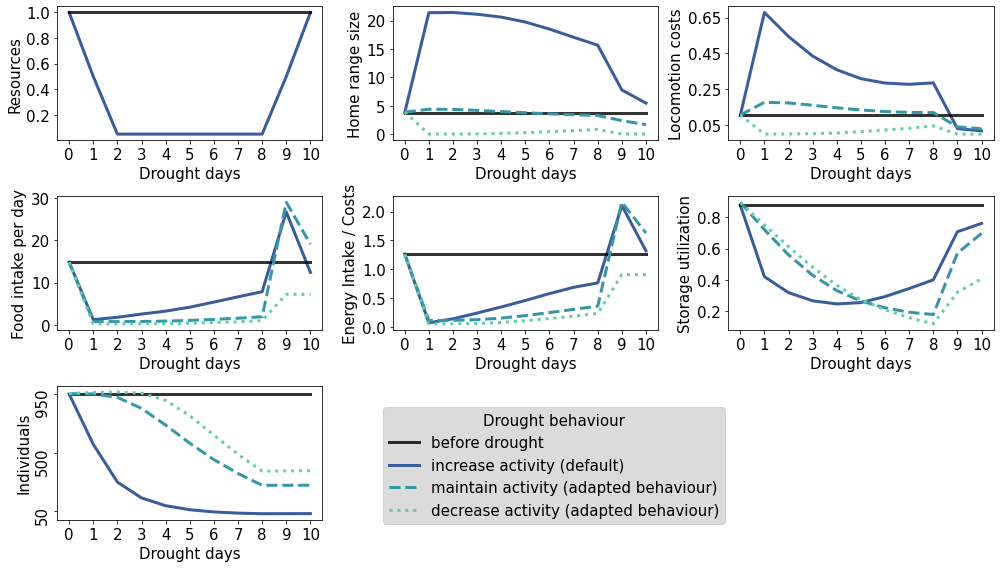

In [19]:
plt.figure(figsize=(14,8))
spec=0
scen=2
c="black"
c2=colors_behaviour
ax1=plt.subplot2grid((3,3),(0,0))
plt.plot([1,0.5,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.5,1],color=c2[1],linewidth=3)
plt.plot([1,1,1,1,1,1,1,1,1,1,1],color=c,alpha=0.8,linewidth=3)
plt.ylabel("Resources",fontsize=15)
plt.xticks(range(11),range(11),fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.yticks(fontsize=15)

plt.subplot2grid((3,3),(0,1))
plt.plot(np.nanmean(drought_hr2[1,scen,:,:,:11],axis=(0,1)),linewidth=3,color=c2[1])
plt.plot([0,10],[np.nanmean(drought_hr2[1,scen,:,:,0],axis=(0,1)),np.nanmean(drought_hr2[1,scen,:,:,0],axis=(0,1))],color=c,alpha=0.8,linewidth=3)
plt.plot(np.nanmean(drought_hr2_strategy2[1,scen,:,:,:11],axis=(0,1)),linewidth=3,color=c2[2],linestyle="--")
plt.plot(np.nanmean(drought_hr2_strategy[1,scen,:,:,:11],axis=(0,1)),linewidth=3,color=c2[3],linestyle=":")
plt.ylabel("Home range size",fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(range(11),range(11),fontsize=15)

plt.subplot2grid((3,3),(0,2))
plt.plot(np.nanmean(drought_locos2[1,scen,:,:,:11],axis=(0,1)),linewidth=3,color=c2[1])
plt.plot([0,10],[np.nanmean(drought_locos2[1,scen,:,:,0],axis=(0,1)),np.nanmean(drought_locos2[1,scen,:,:,0],axis=(0,1))],color=c,alpha=0.8,linewidth=3)
plt.plot(np.nanmean(drought_locos2_strategy2[1,scen,:,:,:11],axis=(0,1)),linewidth=3,color=c2[2],linestyle="--")
plt.plot(np.nanmean(drought_locos2_strategy[1,scen,:,:,:11],axis=(0,1)),linewidth=3,color=c2[3],linestyle=":")
plt.xticks(range(11),range(11),fontsize=15)
plt.ylabel("Locomotion costs",fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.yticks([0.05,0.25,0.45,0.65],fontsize=15)

plt.subplot2grid((3,3),(1,0))
plt.plot(np.nanmean(ins2[1,scen,:,:,449:460],axis=(0,1)),linewidth=3,color=c2[1],label="during drought")
plt.plot([0,10],[np.nanmean(ins2[1,scen,:,:,448],axis=(0,1)),np.nanmean(ins2[1,scen,:,:,448],axis=(0,1))],linewidth=3,color=c,alpha=0.8,label="before drought")
plt.plot(np.nanmean(ins2_strategy2[1,scen,:,:,449:460],axis=(0,1)),linewidth=3,color=c2[2],linestyle="--",label="during drought")
plt.plot(np.nanmean(ins2_strategy[1,scen,:,:,449:460],axis=(0,1)),linewidth=3,color=c2[3],linestyle=":",label="during drought")
plt.ylabel("Food intake per day",fontsize=15)
plt.xticks(range(11),range(11),fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.yticks(fontsize=15)

plt.subplot2grid((3,3),(1,1))
plt.plot(np.nanmean((ins2/2/fmrs2)[1,scen,:,:,449:460],axis=(0,1)),linewidth=3,color=c2[1])
plt.plot([0,10],[np.nanmean((ins2/2/fmrs2)[1,scen,:,:,448],axis=(0,1)),np.nanmean((ins2/2/fmrs2)[1,scen,:,:,448],axis=(0,1))],linewidth=3,color=c,alpha=0.8)
plt.plot(np.nanmean((ins2_strategy2/2/fmrs2_strategy2)[1,scen,:,:,449:460],axis=(0,1)),linewidth=3,color=c2[2],linestyle="--")
plt.plot(np.nanmean((ins2_strategy/2/fmrs2_strategy)[1,scen,:,:,449:460],axis=(0,1)),linewidth=3,color=c2[3],linestyle=":")
plt.ylabel("Energy Intake / Costs",fontsize=15)
plt.xticks(range(11),range(11),fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.yticks(fontsize=15)

plt.subplot2grid((3,3),(1,2))
plt.plot(np.nanmean(drought_stor2[1,scen,:,:,:11],axis=(0,1)),linewidth=3,color=c2[1])
plt.plot([0,10],[np.nanmean(drought_stor2[1,scen,:,:,0],axis=(0,1)),np.nanmean(drought_stor2[1,scen,:,:,0],axis=(0,1))],color=c,alpha=0.8,linewidth=3)
plt.plot(np.nanmean(drought_stor2_strategy2[1,scen,:,:,:11],axis=(0,1)),linewidth=3,color=c2[2],linestyle="--")
plt.plot(np.nanmean(drought_stor2_strategy[1,scen,:,:,:11],axis=(0,1)),linewidth=3,color=c2[3],linestyle=":")
plt.ylabel("Storage utilization",fontsize=15)
plt.xticks(range(11),range(11),fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.subplot2grid((3,3),(2,0))
plt.plot([0,10],[np.nanmean(indivs_single2[1,scen,:,:,448],axis=(0,1)),np.nanmean(indivs_single2[1,scen,:,:,448],axis=(0,1))],alpha=0.8,linewidth=3,color=c,label="before drought")
plt.plot(np.nanmean(indivs_single2[1,scen,:,:,449:460],axis=(0,1)),linewidth=3,color=c2[1],label="increase activity (default)")
plt.plot(np.nanmean(indivs_single2_strategy2[1,scen,:,:,449:460],axis=(0,1)),linewidth=3,color=c2[2],linestyle="--",label="maintain activity (adapted behaviour)")
plt.plot(np.nanmean(indivs_single2_strategy[1,scen,:,:,449:460],axis=(0,1)),linewidth=3,color=c2[3],linestyle=":",label="decrease activity (adapted behaviour)")
plt.ylabel("Individuals",fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.xticks(range(11),range(11),fontsize=15)
plt.yticks([50,500,950],fontsize=15,rotation=90)
plt.tight_layout()
plt.legend(title="Drought behaviour",facecolor="lightgrey",bbox_to_anchor=(1.2,0.9),title_fontsize=15,fontsize=15);


Figure 3:

In [20]:
def calc_res_correct(x,t):
    level=np.min(x[(t-90):t])
    before=x[t]
    low=np.min(x[t:(t+60)])
    resis=low/before
    whenlow=np.where(x[t:(t+60)]==low)[0][0]
    whenback=np.where(x[(t+whenlow):]>level)
    if len(whenback[0])>0:
        recov=whenback[0][0]
    else:
        recov=np.nan
    return(resis,recov)

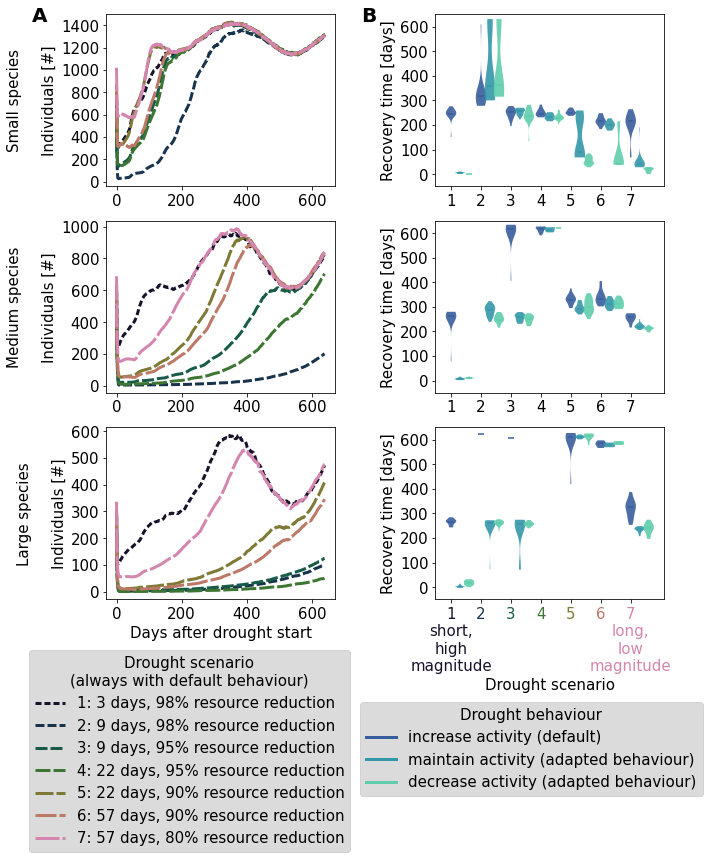

In [21]:
plt.figure(figsize=(14,12))
sx=0
for spec in [0,4,9]:
    plt.subplot2grid((3,3),(sx,0))
    c=colors_drought
    plt.plot(np.nanmean(indivs_single2[1,0,spec,:,450:1090],axis=(0)),linewidth=3,color=c[0],linestyle=(0, (1+1,1)),label="1: 3 days, 98% resource reduction")
    plt.plot(np.nanmean(indivs_single2[1,1,spec,:,450:1090],axis=(0)),linewidth=3,color=c[1],linestyle=(0, (1+2,1)),label="2: 9 days, 98% resource reduction")
    plt.plot(np.nanmean(indivs_single2[1,2,spec,:,450:1090],axis=(0)),linewidth=3,color=c[2],linestyle=(0, (1+3,1)),label="3: 9 days, 95% resource reduction")
    plt.plot(np.nanmean(indivs_single2[1,3,spec,:,450:1090],axis=(0)),linewidth=3,color=c[3],linestyle=(0, (1+4,1)),label="4: 22 days, 95% resource reduction")
    plt.plot(np.nanmean(indivs_single2[1,4,spec,:,450:1090],axis=(0)),linewidth=3,color=c[4],linestyle=(0, (1+5,1)),label="5: 22 days, 90% resource reduction")
    plt.plot(np.nanmean(indivs_single2[1,5,spec,:,450:1090],axis=(0)),linewidth=3,color=c[5],linestyle=(0, (1+6,1)),label="6: 57 days, 90% resource reduction")
    plt.plot(np.nanmean(indivs_single2[1,6,spec,:,450:1090],axis=(0)),linewidth=3,color=c[6],linestyle=(0, (1+7,1)),label="7: 57 days, 80% resource reduction")
    plt.ylabel(["Small","Medium","Large"][sx]+" species\n\nIndividuals [#]",fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    if sx==2:
        plt.xlabel("Days after drought start",fontsize=15)
    if spec==9:
        legend=plt.legend(facecolor="lightgrey",title="Drought scenario\n(always with default behaviour)",bbox_to_anchor=(1.1,-0.25),fontsize=15,title_fontsize=15);
        legend.get_title().set_multialignment('center')
    c=colors_behaviour
    plt.subplot2grid((3,3),(sx,1))
    for scen in range(7):
        all_recov=np.zeros((20,3))
        for rep in range(20):
            all_recov[rep,0]=calc_res_correct(indivs_single2[1,scen,spec,rep,],450)[1]
            all_recov[rep,1]=calc_res_correct(indivs_single2_strategy2[1,scen,spec,rep,],450)[1]
            all_recov[rep,2]=calc_res_correct(indivs_single2_strategy[1,scen,spec,rep,],450)[1]
        for i in range(3):
            if len(all_recov[:,i][np.isnan(all_recov[:,i])==False])>0:
                parts=plt.violinplot(all_recov[:,i][np.isnan(all_recov[:,i])==False],positions=[scen+(i*0.3)],widths=0.35,showmedians=True,showextrema=False)
                partname = 'cmedians'
                vp = parts[partname]
                vp.set_edgecolor(c[i+1])
                for pc in parts['bodies']:
                    pc.set_facecolor(c[i+1])
                    pc.set_alpha(0.9)        
    plt.ylim(-50,650)
    plt.xticks(range(7),range(1,8),fontsize=15)
    if spec==9:
        plt.xticks(range(7),["1\nshort,\nhigh\nmagnitude","2","3","4","5","6","7\nlong,\nlow\nmagnitude"],fontsize=15,color=colors_drought[3])
        for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(),colors_drought):
            ticklabel.set_color(tickcolor)
        plt.xlabel("Drought scenario",fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel("Recovery time [days]",fontsize=15)
    if spec==9:
        plt.plot(1,-100,c=c[1],linewidth=3,label="increase activity (default)")
        plt.plot(1,-100,c=c[2],linewidth=3,label="maintain activity (adapted behaviour)")
        plt.plot(1,-100,c=c[3],linewidth=3,label="decrease activity (adapted behaviour)")
        plt.legend(facecolor="lightgrey",title="Drought behaviour",bbox_to_anchor=(1.2,-0.55),fontsize=15,title_fontsize=15);
    
    sx=sx+1
plt.tight_layout()
plt.text(-14,2300,"A",fontweight="bold",fontsize=20)
plt.text(-3,2300,"B",fontweight="bold",fontsize=20);

Figure 4:

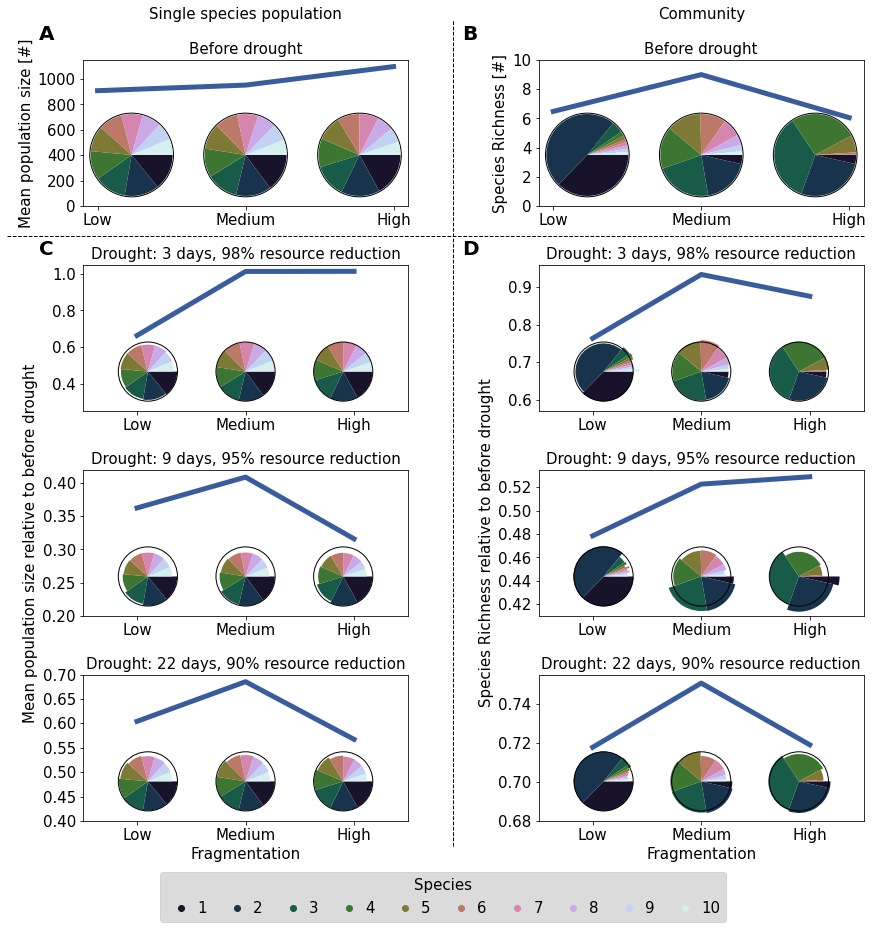

In [22]:
fig=plt.figure(figsize=(14,14))
plt.subplots_adjust(wspace=0.4,hspace=0.4)
ax=plt.subplot2grid((4,2),(0,0))
ax.plot(np.nanmean(np.nanmean(indivs_single2[:3,:,:,:,440],axis=2),axis=(1,2)),color=colors_behaviour[1],linewidth=5)
plt.ylim(0,1150)
plt.yticks(fontsize=15)
plt.ylabel("Mean population size [#]",fontsize=15)
indivs_red=np.nanmean(indivs_single2[:,:,:,:,440],axis=(1,3))
colsall=sns.color_palette("cubehelix", 10)
ins=ax.inset_axes([-0.1,0.0,0.5,0.7])
ins.scatter( 0 , 0 , s=7000,  facecolors='none', edgecolors='black' )
ins.pie(indivs_red[0],counterclock=False,colors=colsall)
ins=ax.inset_axes([0.25,0.0,0.5,0.7])
ins.scatter( 0 , 0 , s=7000,  facecolors='none', edgecolors='black' )
ins.pie(indivs_red[1],counterclock=False,colors=colsall)
ins=ax.inset_axes([0.6,0.0,0.5,0.7])
ins.scatter( 0 , 0 , s=7000,  facecolors='none', edgecolors='black' )
ins.pie(indivs_red[2],counterclock=False,colors=colsall)
plt.xticks(range(3),["Low","Medium","High"],fontsize=15)
plt.title("Single species population\n\nBefore drought",fontsize=15)

ax=plt.subplot2grid((4,2),(0,1))
ax.plot(np.nanmean(np.sum(indivs[:3,:,:,:,1530]>0,axis=2),axis=(1,2)),color=colors_behaviour[1],linewidth=5)
plt.ylim(0,10)
plt.yticks(fontsize=15)
plt.ylabel("Species Richness [#]",fontsize=15)
indivs_red=np.nanmean(indivs[:3,:,:,:,1530],axis=(1,3))
ins=ax.inset_axes([-0.1,0.0,0.5,0.7])
ins.pie(indivs_red[0],counterclock=False,colors=colsall)
ins.scatter( 0 , 0 , s=7000,  facecolors='none', edgecolors='black' )
ins=ax.inset_axes([0.25,0.0,0.5,0.7])
ins.pie(indivs_red[1],counterclock=False,colors=colsall)
ins.scatter( 0 , 0 , s=7000,  facecolors='none', edgecolors='black' )
ins=ax.inset_axes([0.6,0.0,0.5,0.7])
ins.pie(indivs_red[2],counterclock=False,colors=colsall)
ins.scatter( 0 , 0 , s=7000,  facecolors='none', edgecolors='black' )
plt.xticks(range(3),["Low","Medium","High"],fontsize=15)
plt.title("Community\n\nBefore drought",fontsize=15)

for n in range(3):
    ax=plt.subplot2grid((4,2),(1+n,0))
    data=np.nanmean(indivs_single2[:3,:,:,:,440],axis=(1,3))
    data2=np.nanmean(indivs_single2[:3,n*2,:,:,440+365],axis=2)/np.nanmean(indivs_single2[:3,n*2,:,:,440],axis=2)
    ax.plot(np.nanmean(np.nanmean(indivs_single2[:3,n*2,:,:,440+365]/indivs_single2[:3,n*2,:,:,440],axis=1),axis=1),linewidth=5,color=colors_behaviour[1],label="default behaviour")
    plt.xlim(-0.5,2.5)
    plt.yticks(fontsize=15)
    plt.xticks(range(3),["Low","Medium","High"],fontsize=15)
    plt.title(["Drought: 3 days, 98% resource reduction","Drought: 9 days, 95% resource reduction","Drought: 22 days, 90% resource reduction"][n],fontsize=15)
    if n ==2:
        plt.xlabel("Fragmentation",fontsize=15)
    if n==1:
        plt.ylabel("Mean population size relative to before drought",fontsize=15)
    for k in range(3):
        pos=[-0.05,0.25,0.55][k]
        ins=ax.inset_axes([pos,0.02,0.5,0.5])
        data2f=data2[k]
        data2f[data2f==0]=0.00000001
        data2f[np.isnan(data2f)]=0.000001
        for i in range(10):
            if data2[k,i]>1:
                wedges, texts = ins.pie(data[k], radius=1+((data2[k,i]-1)/5),counterclock=False,colors=colsall)
                wedges[i].set_width(1+((data2[k,i]-1)/5))
            else:
                wedges, texts = ins.pie(data[k], radius=1-((1-data2[k,i])/5),counterclock=False,colors=colsall)
                wedges[i].set_width(1-((1-data2[k,i])/5))
            for j in range(10):
                if j != i:
                    wedges[j].set_visible(False)
        ins.scatter( 0 , 0 , s=3500,  facecolors='none', edgecolors='black' )
    if n == 0:
        plt.ylim(0.25,1.05)
    if n==1:
        plt.ylim(0.2,0.42)
    if n==2:
        plt.ylim(0.4,0.7)

for n in range(3):
    ax=plt.subplot2grid((4,2),(1+n,1))
    data=np.nanmean(indivs[:3,:,:,:,1530],axis=(1,3))
    data2=np.nanmean(indivs[:3,n*2,:,:,1530+365*2],axis=2)/np.nanmean(indivs[:3,n*2,:,:,1530],axis=2)
    plt.plot(np.nanmean(np.sum(indivs[:3,n*2,:,:,1530+365*2]>0,axis=1),axis=1)/np.nanmean(np.sum(indivs[:3,:,:,:,1530]>0,axis=2),axis=(1,2)),linewidth=5,color=colors_behaviour[1],label="default behaviour")
    plt.xlim(-0.5,2.5)
    plt.yticks(fontsize=15)
    plt.xticks(range(3),["Low","Medium","High"],fontsize=15)
    plt.title(["Drought: 3 days, 98% resource reduction","Drought: 9 days, 95% resource reduction","Drought: 22 days, 90% resource reduction"][n],fontsize=15)
    if n ==2:
        plt.xlabel("Fragmentation",fontsize=15)
    if n==1:
        plt.ylabel("Species Richness relative to before drought",fontsize=15)
    for k in range(3):
        pos=[-0.05,0.25,0.55][k]
        ins=ax.inset_axes([pos,0.02,0.5,0.5])
        data2f=data2[k]
        data2f[data2f==0]=0.00000001
        data2f[np.isnan(data2f)]=0.000001
        for i in range(10):
            if data2[k,i]>1:
                wedges, texts = ins.pie(data[k], radius=1+((data2[k,i]-1)/5),counterclock=False,colors=colsall)
                wedges[i].set_width(1+((data2[k,i]-1)/5))
            else:
                wedges, texts = ins.pie(data[k], radius=1-((1-data2[k,i])/5),counterclock=False,colors=colsall)
                wedges[i].set_width(1-((1-data2[k,i])/5))
            for j in range(10):
                if j != i:
                    wedges[j].set_visible(False)
        ins.scatter( 0 , 0 , s=3500,  facecolors='none', edgecolors='black' ) 
    if n == 0:
        plt.ylim(0.57,0.96)
    if n==1:
        plt.ylim(0.41,0.535)
    if n==2:
        plt.ylim(0.68,0.755)

labelsall=np.arange(1,11,1)
hand=[]
for i in range(10):
    handle, =plt.plot([0,0.6],[-100,-100],'o',label=labelsall[i],color=colsall[i])
    hand.append(handle)
plt.legend(title="Species",handles=hand,bbox_to_anchor=(0.6,-0.3),facecolor="lightgrey",fontsize=15,title_fontsize=15,ncol=11,columnspacing=1,handletextpad=0.1)
        
line = plt.Line2D((0.05,.9),(0.705,0.705), linestyle="--",color="k",linewidth=1)
fig.add_artist(line)
line = plt.Line2D((.492,.492),(.1,.92), linestyle="--",color="k",linewidth=1)
fig.add_artist(line)
plt.text(-5.1,1.08,"A",fontweight="bold",fontsize=20)
plt.text(-1.2,1.08,"B",fontweight="bold",fontsize=20)
plt.text(-5.1,0.97,"C",fontweight="bold",fontsize=20)
plt.text(-1.2,0.97,"D",fontweight="bold",fontsize=20);

Figure 5:

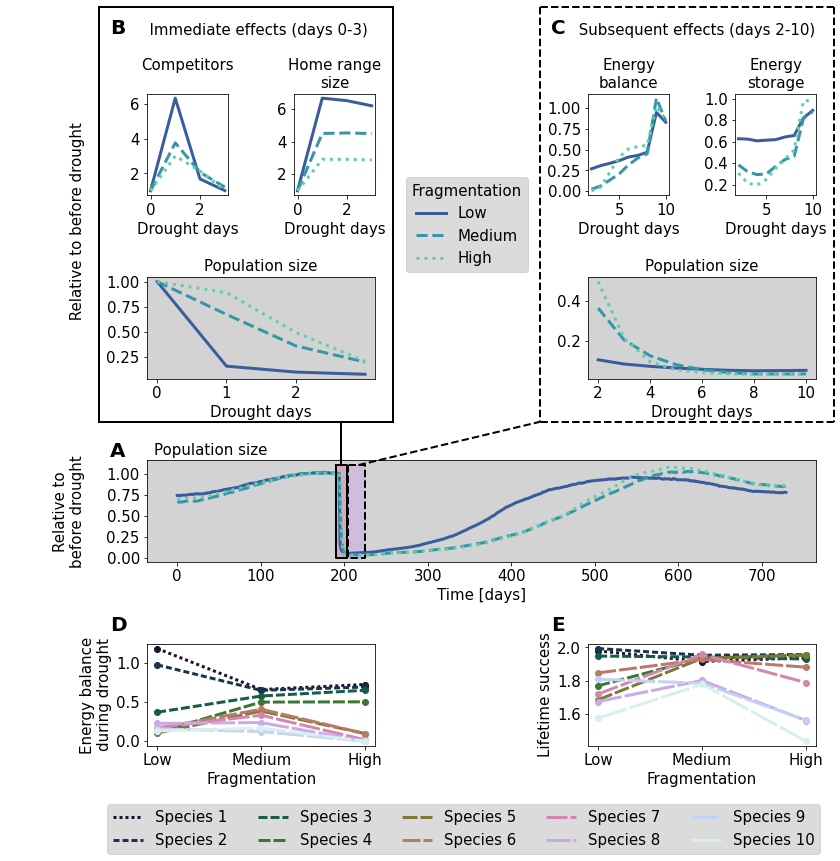

In [23]:
fig=plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.8,hspace=0.8)
scen=2
ax=plt.subplot2grid((4,5),(2,0),colspan=5)
for i in range(3):
    plt.plot(np.nanmean(indivs[i,scen,:,:,int(365*3.7):int(365*5.7)],axis=(0,1))/np.nanmean(indivs[i,scen,:,:,1544],axis=(0,1)),linewidth=3,color=colors_frag[i+1],label="during drought",linestyle=["-","--",":"][i])
plt.xticks(fontsize=15)
plt.xlabel("Time [days]",fontsize=15)
plt.title("Population size                                                                                                                  ",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Relative to\nbefore drought\n",fontsize=15)
plt.plot([190,190,203,203,190],[1.1,0,0,1.1,1.1],"-",color="black",linewidth=2)
plt.fill_between([190,203],[0,0],[1.1,1.1],color=colors_species[6],alpha=0.5)
plt.plot([205,205,225,225,205],[1.1,0,0,1.1,1.1],"--",color="black",linewidth=2)
plt.fill_between([205,225],[0,0],[1.1,1.1],color=colors_species[7],alpha=0.5)
ax.set_facecolor("lightgrey")

ax=plt.subplot2grid((4,5),(1,0),colspan=2)
for i in range(3):
    plt.plot(np.nanmean(indivs[i,scen,:,:,1544:1548],axis=(0,1))/np.nanmean(indivs[i,scen,:,:,1544],axis=(0,1)),linewidth=3,color=colors_frag[i+1],label=["Low","Medium","High"][i],linestyle=["-","--",":"][i])
plt.ylabel("                                             Relative to before drought\n",fontsize=15)
plt.xticks(range(3),fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.title("Population size",fontsize=15)
plt.yticks(fontsize=15)
ax.set_facecolor("lightgrey")
plt.legend(title="Fragmentation",title_fontsize=15,facecolor="lightgrey",fontsize=15,ncol=1,bbox_to_anchor=(1.7,2.05))

ax=plt.subplot2grid((4,5),(1,3),colspan=2)
for i in range(3):
    plt.plot(range(2,11),np.nanmean(indivs[i,scen,:,:,1546:1555],axis=(0,1))/np.nanmean(indivs[i,scen,:,:,1544],axis=(0,1)),linewidth=3,color=colors_frag[i+1],label=["Low","Medium","High"][i],linestyle=["-","--",":"][i])
plt.xticks(fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.title("Population size",fontsize=15)
plt.yticks(fontsize=15)
ax.set_facecolor("lightgrey")


plt.subplot2grid((4,5),(0,1))
for i in range(3):
    plt.plot(np.nanmean(drought_hr[i,scen,:,:,:4],axis=(0,1))/np.nanmean(drought_hr[i,scen,:,:,0],axis=(0,1)),linewidth=3,color=colors_frag[i+1],linestyle=["-","--",":"][i])
plt.xticks(fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.title("Home range\nsize", fontsize=15)
plt.yticks(fontsize=15)
    
plt.subplot2grid((4,5),(0,0))
for i in range(3):
    plt.plot(np.nanmean(drought_compet[i,scen,:,:,:4],axis=(0,1))/np.nanmean(drought_compet[i,scen,:,:,0],axis=(0,1)),linewidth=3,color=colors_frag[i+1],linestyle=["-","--",":"][i])
plt.xticks(fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.title("                              Immediate effects (days 0-3)\n\nCompetitors\n",fontsize=15)
plt.yticks(fontsize=15)

plt.subplot2grid((4,5),(0,3))
for i in range(3):
    plt.plot(range(2,11),np.nanmean((balances)[i,scen,:,:,1546:1555],axis=(0,1))/np.nanmean((balances)[i,scen,:,:,1544],axis=(0,1)),linewidth=3,color=colors_frag[i+1],linestyle=["-","--",":"][i])
plt.xticks(fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.title("                             Subsequent effects (days 2-10)\n\nEnergy\nbalance",fontsize=15)
plt.yticks(fontsize=15)
    
plt.subplot2grid((4,5),(0,4))
for i in range(3):
    plt.plot(range(2,11),np.nanmean(drought_stor[i,scen,:,:,2:11],axis=(0,1))/np.nanmean(drought_stor[i,scen,:,:,0],axis=(0,1)),linewidth=3,color=colors_frag[i+1],linestyle=["-","--",":"][i])
plt.xticks(fontsize=15)
plt.xlabel("Drought days",fontsize=15)
plt.title("Energy\nstorage",fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0.1,1.05)

plt.subplot2grid((4,5),(3,0),colspan=2)
for i in range(10):
    plt.plot(np.nanmean(balances[:3,scen,i,:,1544:1555],axis=(1,2)),color=colors_species[i],linestyle=(0, (1+i,1)),linewidth=3)
    plt.plot(np.nanmean(balances[:3,scen,i,:,1544:1555],axis=(1,2)),"o",color=colors_species[i])
plt.ylabel("Energy balance\nduring drought",fontsize=15)
plt.xticks(range(3),["Low","Medium","High"],fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Fragmentation",fontsize=15)

plt.subplot2grid((4,5),(3,3),colspan=2)
for i in range(10):
    plt.plot(np.nanmean(repsuchr[:3,scen,i,:],axis=(1)),color=colors_species[i],linestyle=(0, (1+i,1)),linewidth=3,label="Species "+str(i+1))
    plt.plot(np.nanmean(repsuchr[:3,scen,i,:],axis=(1)),"o",color=colors_species[i])
plt.xticks(range(3),["Low","Medium","High"],fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Fragmentation",fontsize=15)
plt.legend(fontsize=15,bbox_to_anchor=(1.05,-0.5),ncol=5,facecolor="lightgrey")
plt.ylabel("Lifetime success",fontsize=15)

line1 = plt.Line2D((.41,.41),(0.98,.5), linestyle="-",color="black",linewidth=2)
line2 = plt.Line2D((.07,.07),(0.98,.5), linestyle="-",color="black",linewidth=2)
line3 = plt.Line2D((.07,.41),(0.98,.98), linestyle="-",color="black",linewidth=2)
line4 = plt.Line2D((.07,.41),(0.5,.5), linestyle="-",color="black",linewidth=2)

line5 = plt.Line2D((.58,.58),(0.98,.5), linestyle="--",color="black",linewidth=2)
line6 = plt.Line2D((.92,.92),(0.98,.5), linestyle="--",color="black",linewidth=2)
line7 = plt.Line2D((.92,.58),(0.98,.98), linestyle="--",color="black",linewidth=2)
line8 = plt.Line2D((.92,.58),(0.5,.5), linestyle="--",color="black",linewidth=2)

line9 = plt.Line2D((.35,.35),(0.45,.5), linestyle="-",color="black",linewidth=2)
line10 = plt.Line2D((.37,.58),(0.45,.5), linestyle="--",color="black",linewidth=2)

fig.add_artist(line1)
fig.add_artist(line2)
fig.add_artist(line3)
fig.add_artist(line4)

fig.add_artist(line5)
fig.add_artist(line6)
fig.add_artist(line7)
fig.add_artist(line8)

fig.add_artist(line9)
fig.add_artist(line10)

plt.text(-4.7,3.15,"A",fontweight="bold",fontsize=20)
plt.text(-4.7,5.7,"B",fontweight="bold",fontsize=20)
plt.text(-0.45,5.7,"C",fontweight="bold",fontsize=20)
plt.text(-4.7,2.1,"D",fontweight="bold",fontsize=20)
plt.text(-0.45,2.1,"E",fontweight="bold",fontsize=20);

Figure 6:

For Figure 6 and simulation of observed droughts, the data from the UFZ Drought monitor / Helmholtz Centre for Environmental Research is required (https://www.ufz.de/index.php?en=37937). We do not provide this data here.

In [3]:
monitordata_com = pd.read_csv("mibcom_data_community.csv")

In [4]:
indivs_data=np.zeros((3,8,20,1,10,10,4750))

covia_data=np.zeros((3,8,20,1,10))

f=monitordata_com
ix=0
for i in [0.9999,0.999,0.99]:
    fi=f[f["clump"]==i]
    lx=0
    files=["Data1_drought1952_002.csv","Data1_drought1952_005.csv","Data1_drought1952_01.csv","Data1_drought1952_02.csv","Data1_drought2009_002.csv","Data1_drought2009_005.csv","Data1_drought2009_01.csv","Data1_drought2009_02.csv"]
    for file in range(8):
        mx=0
        fl=fi[fi["Drought_file"]==files[file]]
        for m in range(20):
                fm=fl[fl["Location"]==m]
                cx=0
                for c in [1]:
                    fc=fm
                    rx=0
                    for r in np.unique(fc["[run number]"]):
                        f1=fc[fc["[run number]"]==r]
                        for j in range(10):
                            current_array=str.split(list(f1["number"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            indivs_data[ix,lx,mx,cx,j,rx,:len(desired_array)]=desired_array
                            
                            covia_data[ix,lx,mx,cx,rx]=np.where(np.sum(indivs_data[ix,lx,mx,cx,:,rx]>0,axis=0)<5)[0][0]
                        rx=rx+1
                    cx=cx+1
                mx=mx+1
        lx=lx+1
    ix=ix+1

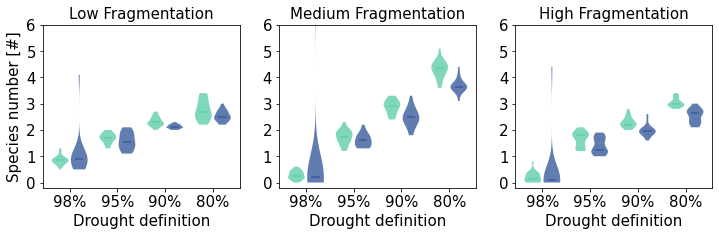

In [10]:
plt.figure(figsize=(12,3))

for j in range(3):
    plt.subplot2grid((1,3),(0,j))
    c=colors_frag[3]
    parts=plt.violinplot(np.transpose(np.mean(np.sum(indivs_data[j,0:4,:,0,:,:,4740]>0,axis=2),axis=(2))),positions=range(4),widths=0.35,showmedians=True,showextrema=False)
    partname = 'cmedians'
    vp = parts[partname]
    vp.set_edgecolor(c)
    for pc in parts['bodies']:
        pc.set_facecolor(c)
        pc.set_alpha(0.8)
    c=colors_frag[1]
    parts=plt.violinplot(np.transpose(np.mean(np.sum(indivs_data[j,4:8,:,0,:,:,4740]>0,axis=2),axis=(2))),positions=np.arange(0.4,4.4,1),widths=0.35,showmedians=True,showextrema=False)
    partname = 'cmedians'
    vp = parts[partname]
    vp.set_edgecolor(c)
    for pc in parts['bodies']:
        pc.set_facecolor(c)
        pc.set_alpha(0.8)
    plt.ylim(-0.2,6)
    plt.title(["Low","Medium","High"][j]+" Fragmentation",fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(np.arange(0.2,4.2,1),["98%","95%","90%","80%"],fontsize=15)
    plt.xlabel("Drought definition",fontsize=15)
    if j==0:
        plt.ylabel("Species number [#]",fontsize=15);